In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [9]:
data=pd.read_csv('car_data.csv')
data.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  816 non-null    int64 
 1   name        816 non-null    object
 2   company     816 non-null    object
 3   year        816 non-null    int64 
 4   Price       816 non-null    int64 
 5   kms_driven  816 non-null    int64 
 6   fuel_type   816 non-null    object
dtypes: int64(4), object(3)
memory usage: 44.8+ KB


## Quality
- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom  condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values 

## Cleaning Data 


In [11]:
backup=data.copy()

#### year has many non-year values

#### year is in object. Change to integer

In [12]:
data['year']=data['year'].astype(int)

#### Price has Ask for Price

In [13]:
data=data[data['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

####  kms_driven has object values with kms at last.

#### It has nan values and two rows have 'Petrol' in them

In [14]:
data['kms_driven']=data['kms_driven'].astype(int)

#### fuel_type has nan values

In [15]:
data=data[~data['fuel_type'].isna()]

In [16]:
data.shape

(816, 7)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [17]:
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [18]:
data=data.reset_index(drop=True)

## Cleaned Data

In [19]:
data

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...,...
811,811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [20]:
final_dataset = data[["year", "Price",  "kms_driven", "fuel_type","company"]]
final_dataset['fuel_type'].unique()
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
final_dataset

,year,Price,kms_driven,fuel_type_LPG,fuel_type_Petrol,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,...,company_Mercedes,company_Mini,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo
0,2007,80000,45000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2006,425000,40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2014,325000,28000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2014,575000,36000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2012,175000,41000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2011,270000,50000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
812,2009,110000,30000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
813,2009,300000,132000,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
814,2018,260000,27000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [21]:
final_dataset.corr(method ='pearson').head()

,year,Price,kms_driven,fuel_type_LPG,fuel_type_Petrol,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,...,company_Mercedes,company_Mini,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo
year,1.000000,0.287193,-0.233695,0.000683,-0.191624,-0.045264,-0.012456,0.099272,-0.056051,0.036056,...,-0.056183,0.013808,0.022700,0.037043,0.114016,-0.053293,0.066847,-0.077591,0.029551,0.022373
Price,0.287193,1.000000,-0.120854,-0.021577,-0.193596,0.133712,-0.092045,-0.030557,-0.044610,0.023763,...,0.137547,0.309975,0.160684,0.008871,0.021094,-0.043009,-0.130577,0.050996,-0.001500,0.106089
kms_driven,-0.233695,-0.120854,1.000000,0.099385,-0.268928,-0.002245,0.011662,-0.091118,0.023598,-0.018174,...,-0.033753,-0.096235,-0.004537,-0.007053,-0.082224,0.019098,0.263160,0.127536,0.000616,-0.004369
fuel_type_LPG,0.000683,-0.021577,0.099385,1.000000,-0.052061,-0.004932,-0.010336,-0.004611,-0.003479,-0.003479,...,-0.004266,-0.004932,-0.004266,-0.004266,-0.010176,-0.006307,-0.014583,-0.010649,-0.007653,-0.001736
fuel_type_Petrol,-0.191624,-0.193596,-0.268928,-0.052061,1.000000,-0.029789,-0.059355,0.088566,0.031691,-0.073715,...,0.024499,0.094740,-0.032947,-0.004224,-0.115960,-0.055241,-0.173043,-0.034443,-0.064530,-0.036790


In [22]:
corrmat = final_dataset.corr(method='pearson')

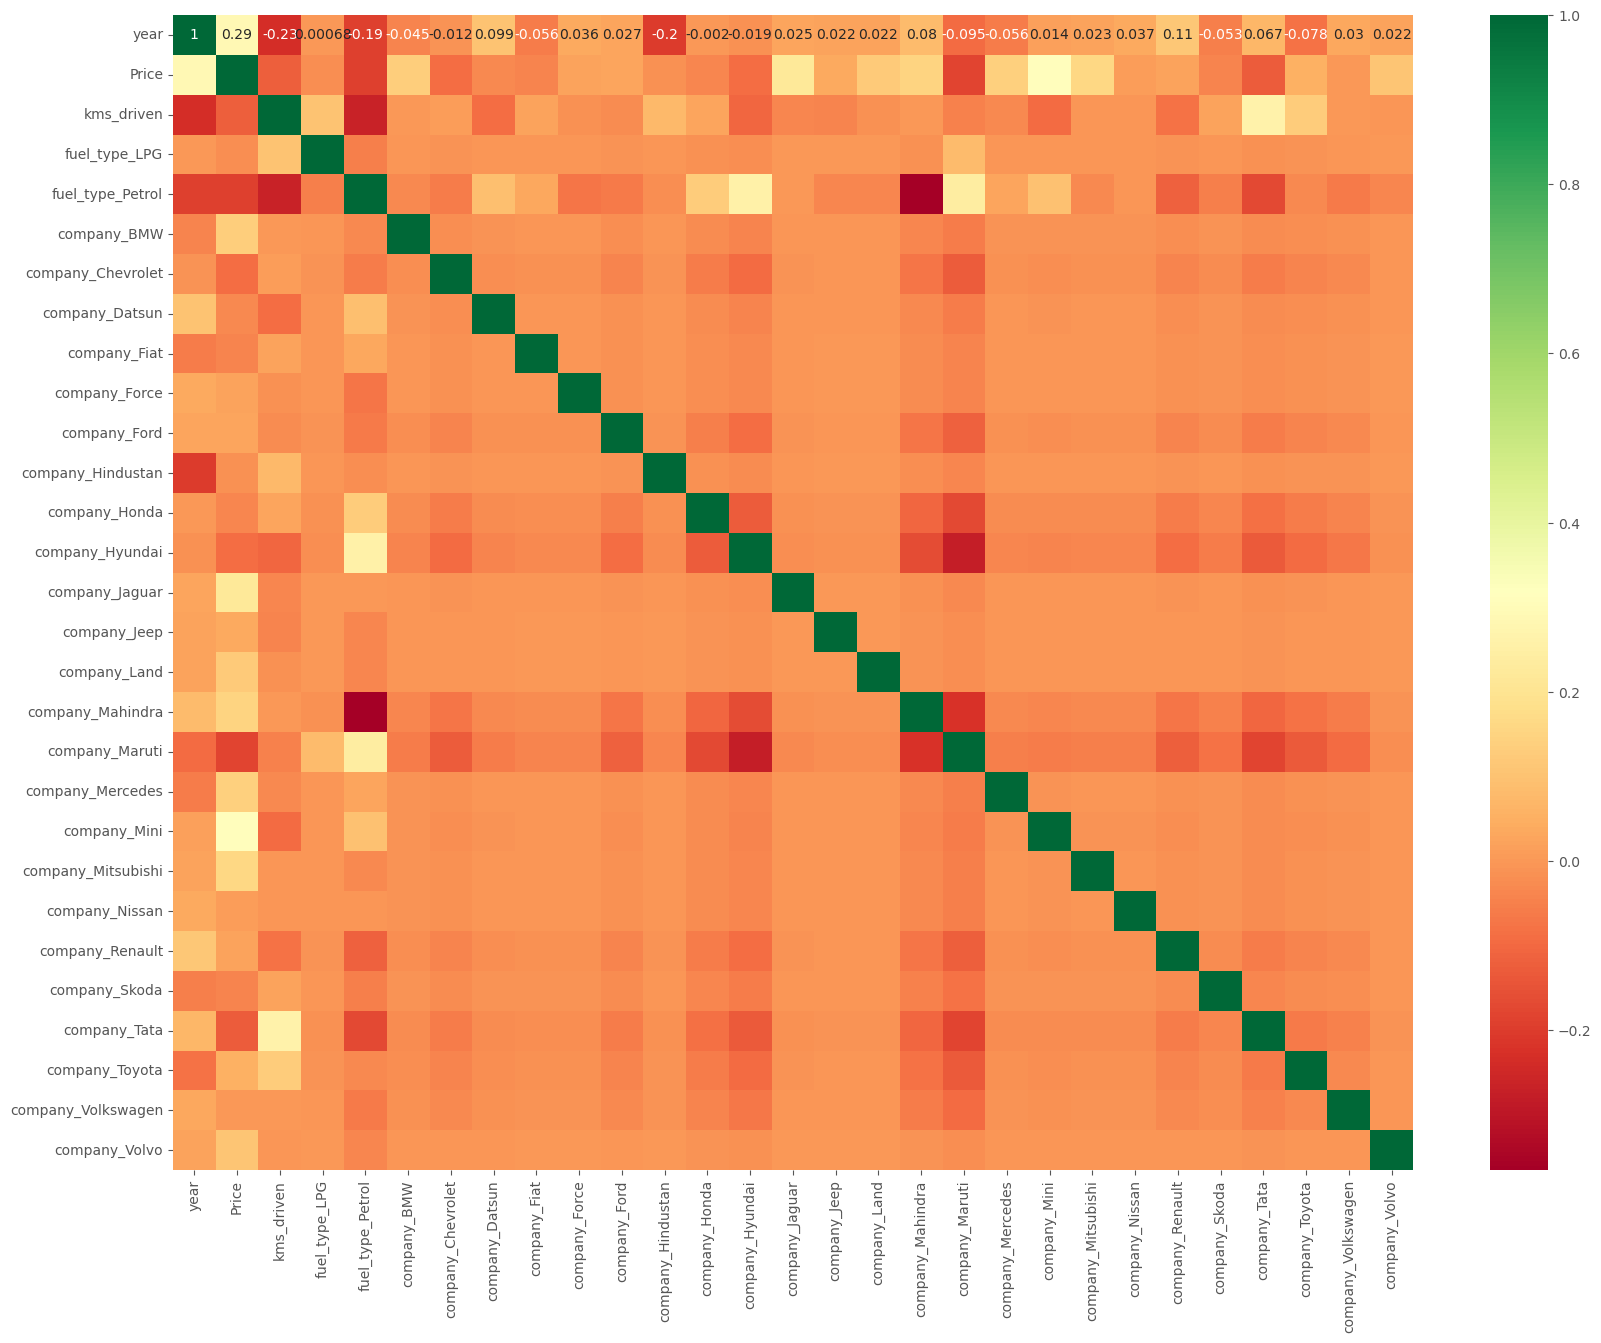

In [23]:
import seaborn as sns
corrmat = final_dataset.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
g=sns.heatmap(final_dataset[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

In [24]:
data.to_csv('Car_data.csv')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  816 non-null    int64 
 1   name        816 non-null    object
 2   company     816 non-null    object
 3   year        816 non-null    int32 
 4   Price       816 non-null    int64 
 5   kms_driven  816 non-null    int32 
 6   fuel_type   816 non-null    object
dtypes: int32(2), int64(2), object(3)
memory usage: 38.4+ KB


In [26]:
data.describe(include='all')

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
count,816.000000,816,816,816.000000,8.160000e+02,816.000000,816
unique,NaN,254,25,NaN,NaN,NaN,3
top,NaN,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,NaN,51,221,NaN,NaN,NaN,428
mean,407.500000,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,235.703203,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,0.000000,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,203.750000,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,407.500000,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,611.250000,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [27]:
data=data[data['Price']<6000000]

### Checking relationship of Company with Price

In [28]:
data['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [29]:
import seaborn as sns

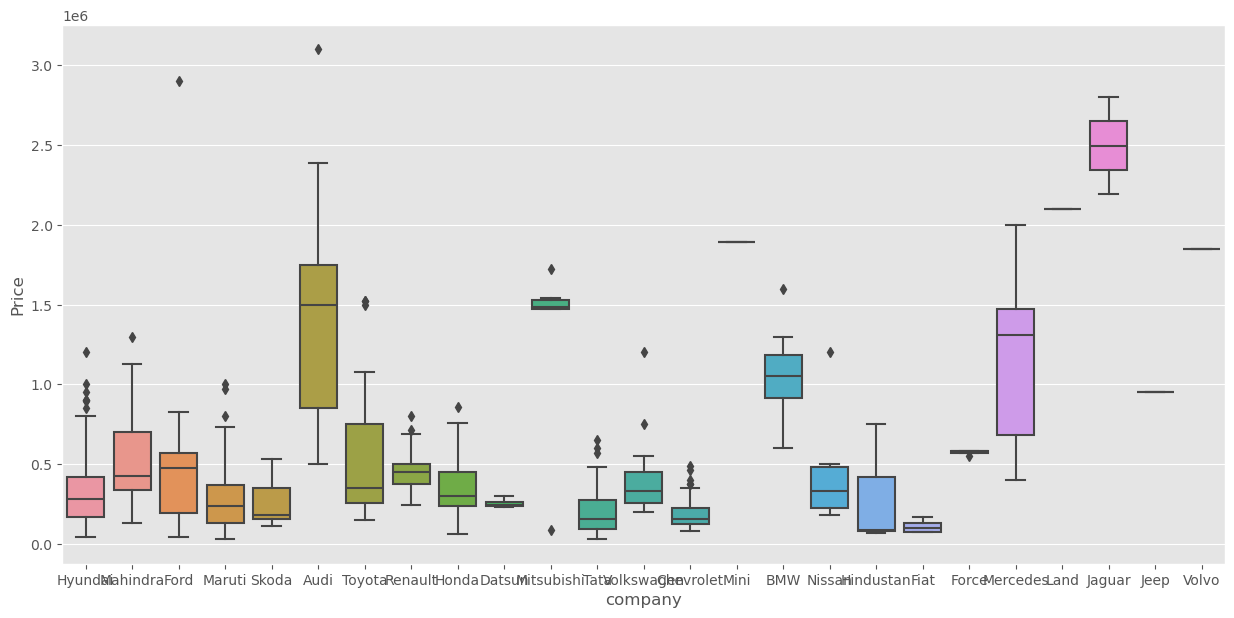

In [30]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=data)
plt.show()

### Checking relationship of Year with Price


c:\Users\sumit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sumit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


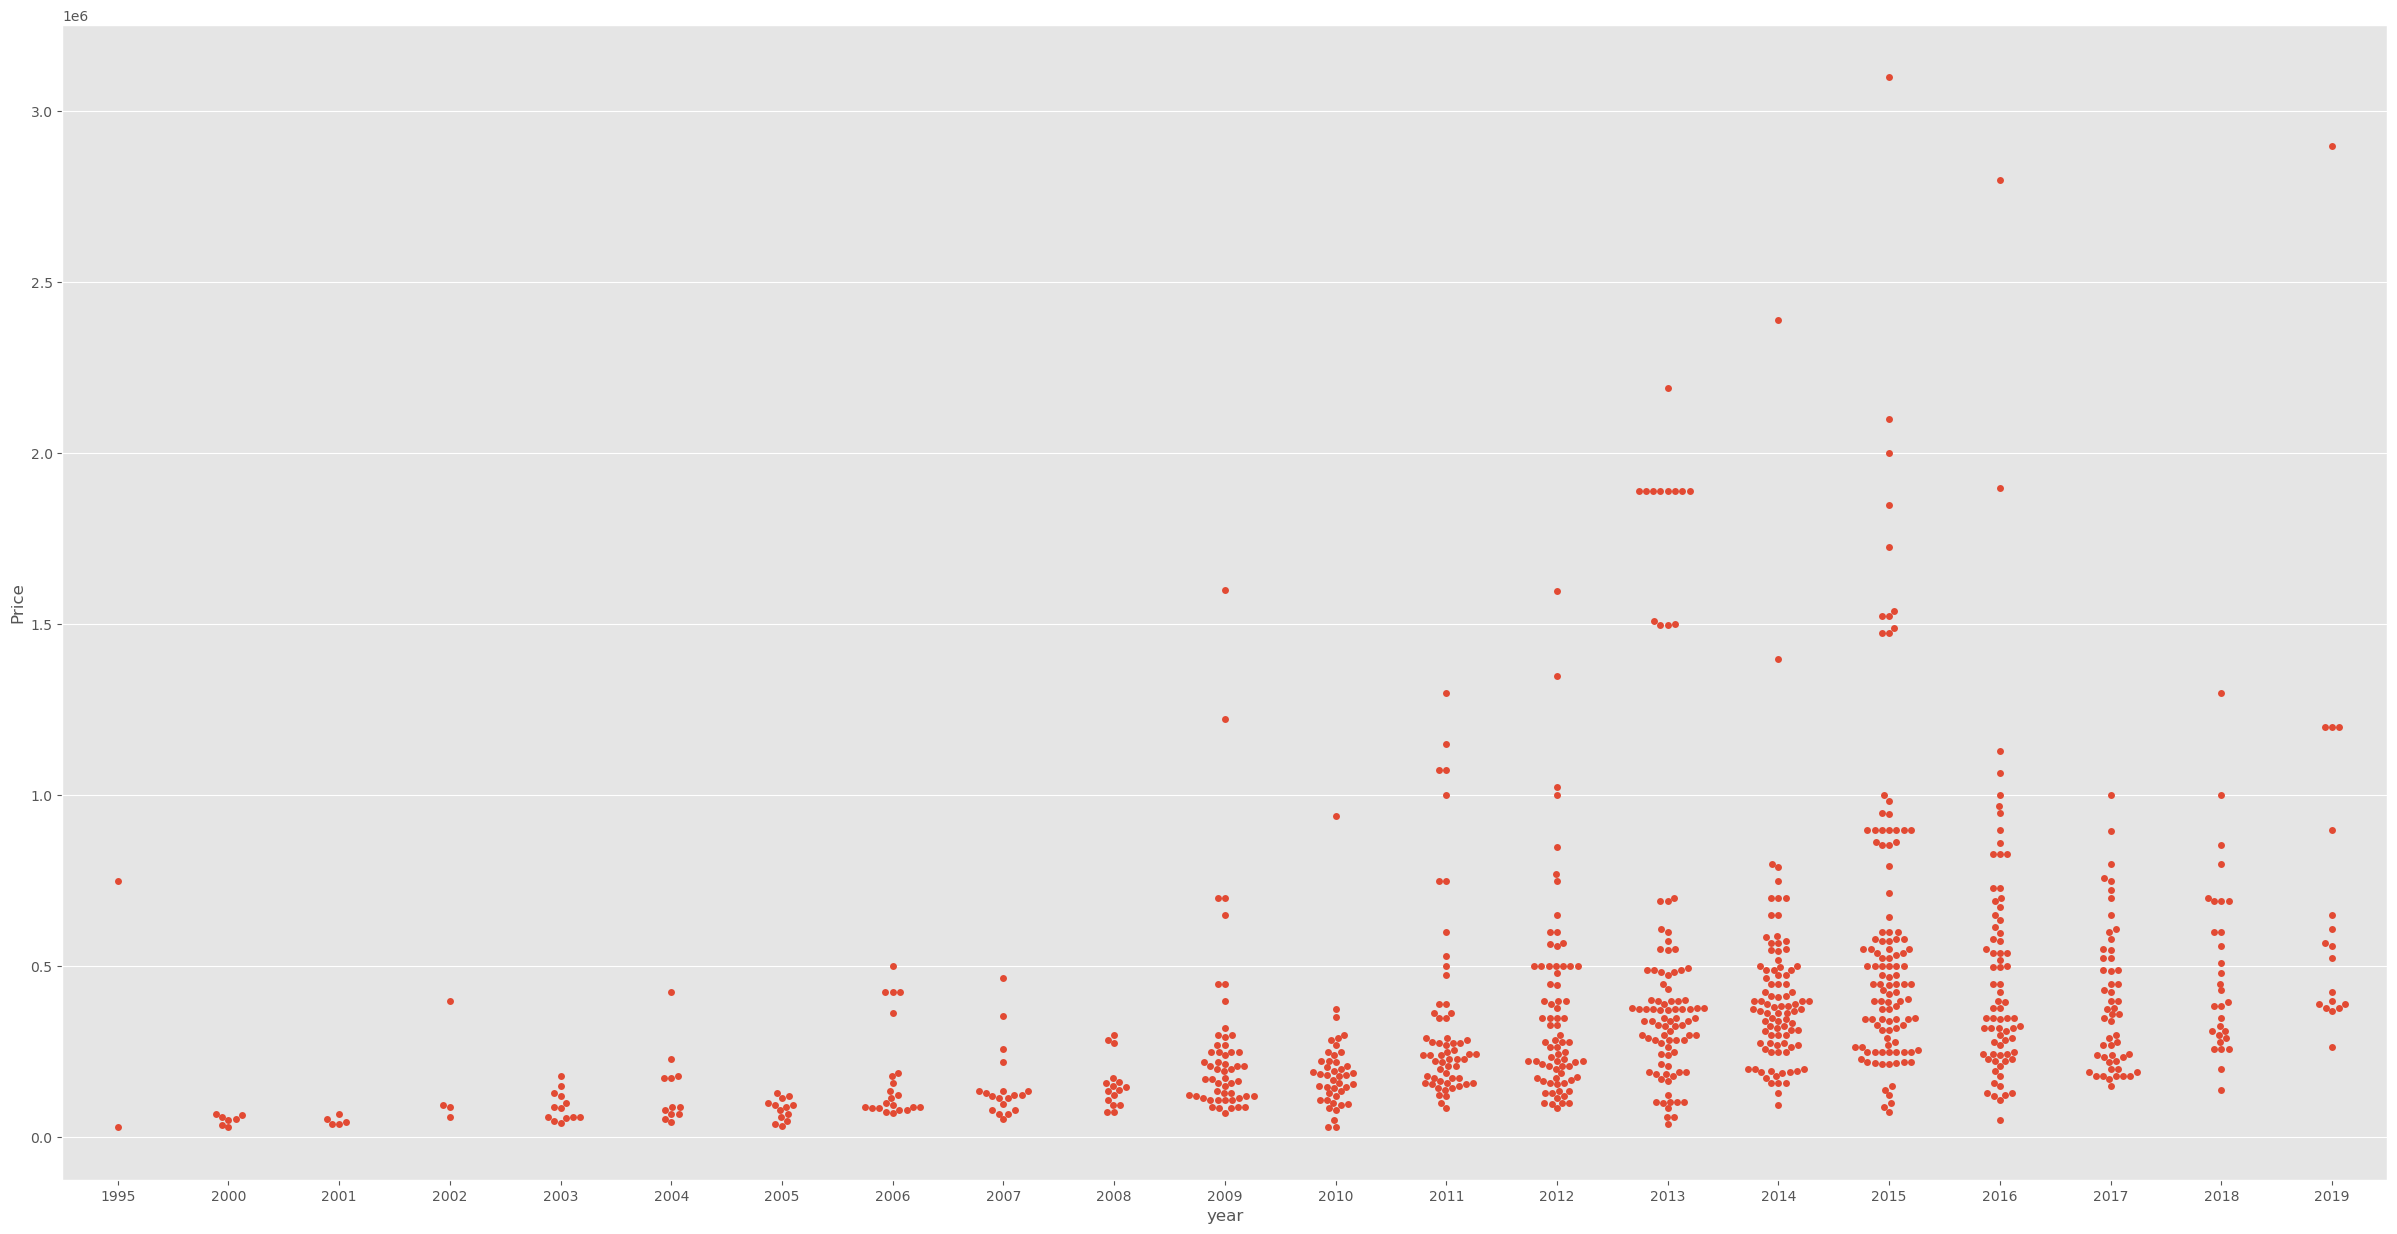

In [31]:
plt.subplots(figsize=(30,15))
ax=sns.swarmplot(x='year',y='Price',data=data)
plt.show()

### Checking relationship of kms_driven with Price

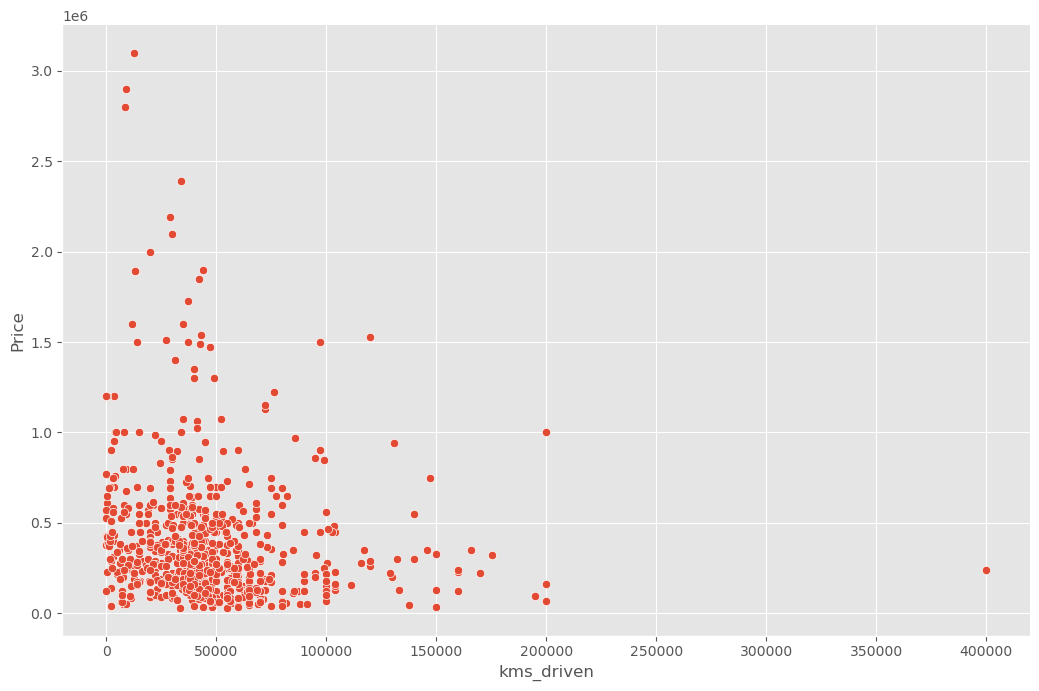

In [32]:
sns.relplot(x='kms_driven',y='Price',data=data,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

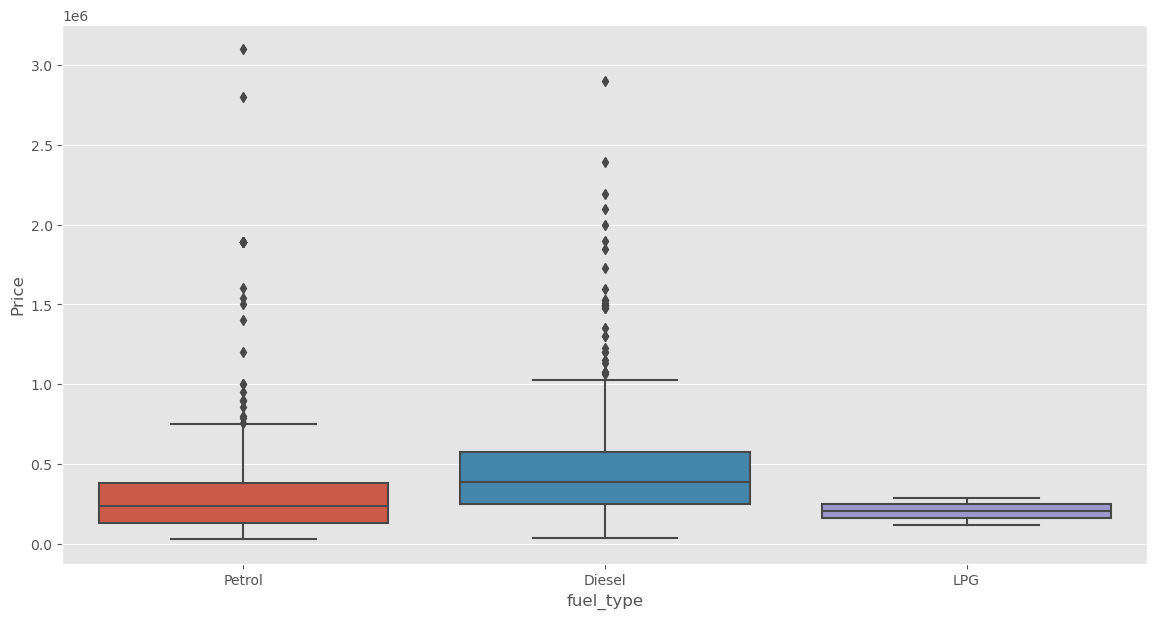

In [33]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=data)

### Relationship of Price with FuelType, Year and Company mixed

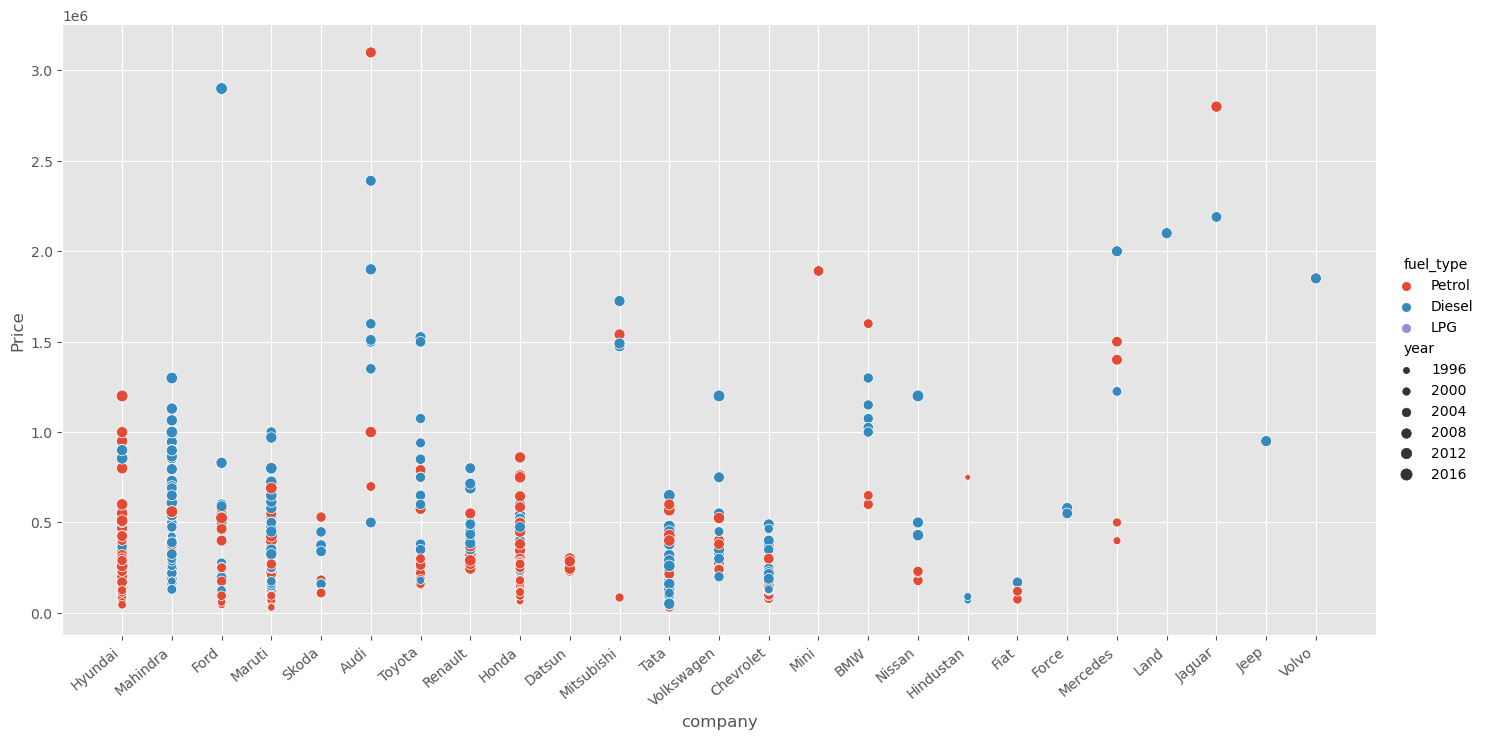

In [34]:
ax=sns.relplot(x='company',y='Price',data=data,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [35]:
X=data[['name','company','year','kms_driven','fuel_type']]
y=data['Price']

In [36]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [37]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 815, dtype: int64

### Applying Train Test Split

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [41]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [42]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [43]:
lr=LinearRegression()

#### Making a pipeline

In [44]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [45]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [46]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [47]:
r2_score(y_test,y_pred)

0.4578918453585903

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [48]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [49]:
np.argmax(scores)

433

In [50]:
scores[np.argmax(scores)]

0.845714559204688

In [51]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([431224.12154759])

#### The best model is found at a certain random state 

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.845714559204688

In [53]:
import pickle

In [54]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [55]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([458859.11387584])

In [56]:
y_pred=pipe.predict(X_test)
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("error=",rmse)

error= 162895.76019347078
